# Matheus Araujo Pinheiro
# Julia Grasiozi Ortiz
# Katlyn Ribeiro

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [ ]:
def f(x, y):
    return x / y

def euler(f, x0, y0, h, steps):
    xValores = [x0]
    yValores = [y0]
    for _ in range(steps):
        yProx = yValores[-1] + h * f(xValores[-1], yValores[-1])
        XProx = xValores[-1] + h
        xValores.append(XProx)
        yValores.append(yProx)
        if xValores[-1]*yValores[-1] >= 4:
          break
    return xValores, yValores


# Parâmetros
h = 0.05
steps = 30

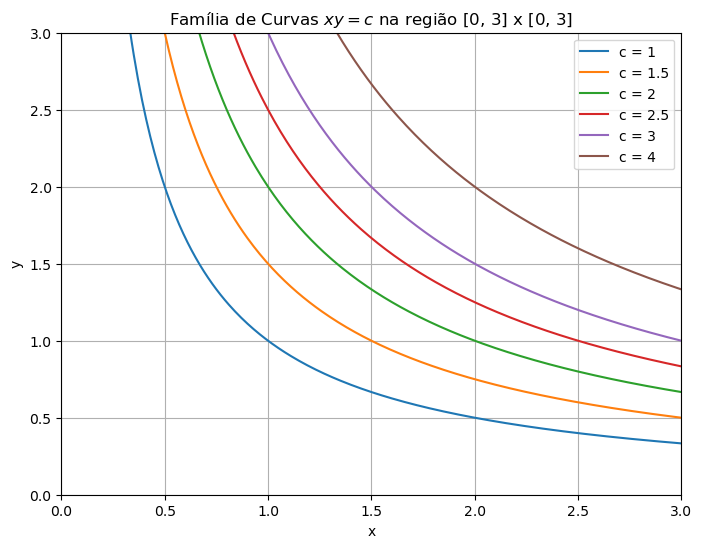

In [ ]:
# Definindo o intervalo de x e os valores de c
xValores = np.linspace(0.01, 3, 300)  # x = 0
cValores = [1, 3/2, 2, 5/2, 3, 4]  # valores de c

# Plotando as curvas para cada valor de c
plt.figure(figsize=(8, 6))
for c in cValores:
    yValores = c / xValores  # y = c / x para a curva xy = c
    plt.plot(xValores, yValores, label=f'c = {c}', linewidth=1.5)

# Configurações do gráfico
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Família de Curvas $xy = c$ na região [0, 3] x [0, 3]')
plt.legend()
plt.grid(True)
plt.show()

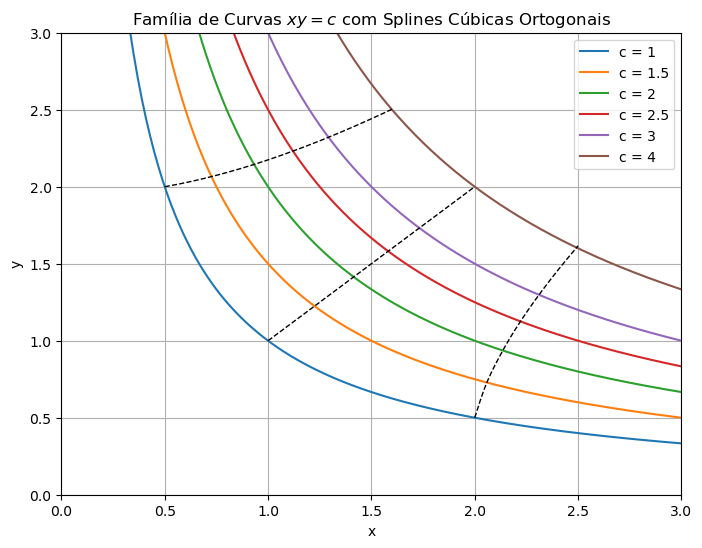

In [4]:
# Ponto inicial para várias trajetórias ortogonais
initial_points = [(0.5, 2), (1.0, 1.0), (2, 0.5)]

# Plotando as curvas para cada valor de c (xy = c)
plt.figure(figsize=(8, 6))
for c in cValores:
    yValores = c / xValores  # y = c / x para a curva xy = c
    plt.plot(xValores, yValores, label=f'c = {c}', linewidth=1.5)

# Calcular e plotar as splines cúbicas para as trajetórias ortogonais
for x0, y0 in initial_points:
    x_traj, y_traj = euler(f, x0, y0, h, steps)

    # Usar interpolação spline cúbica nos pontos calculados
    spline = CubicSpline(x_traj, y_traj, bc_type = 'natural')
    x_spline = np.linspace(min(x_traj), max(x_traj), 200)
    y_spline = spline(x_spline)

    # Plotar as splines cúbicas ortogonais
    plt.plot(x_spline, y_spline, '--', color='black', linewidth=1)

# Configurações finais do gráfico
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Família de Curvas $xy = c$ com Splines Cúbicas Ortogonais')
plt.legend()
plt.grid(True)
plt.show()



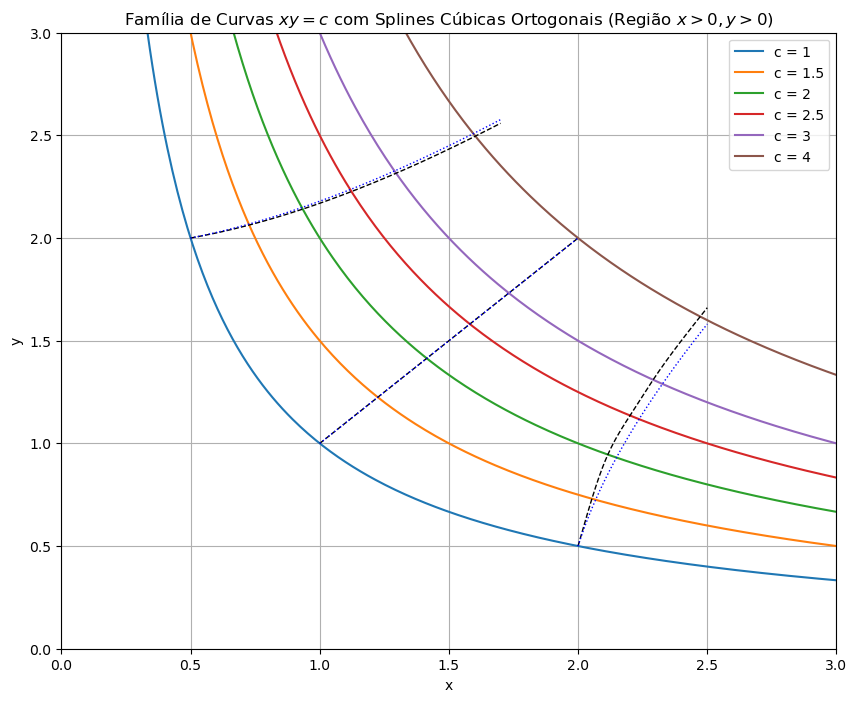

Erro médio para spline 1 (ponto inicial (0.5, 2)): 0.010743
Erro médio para spline 2 (ponto inicial (1.0, 1.0)): 0.000000
Erro médio para spline 3 (ponto inicial (2, 0.5)): 0.077883


In [5]:
# Solução exata para y^2 - x^2 = c
def exact_solution(x, c):
    return np.sqrt(x**2 + c), -np.sqrt(x**2 + c)

# Valores iniciais
cValores = [1, 3/2, 2, 5/2, 3, 4]  # Constantes da família de curvas
xValores = np.linspace(0.1, 3, 300)  # Evitar x=0 devido a singularidade
initial_points = [(0.5, 2), (1.0, 1.0), (2, 0.5)]  # Pontos iniciais para as splines cúbicas
h = 0.1  # Passo do método de Euler
steps = 50  # Número de passos do método de Euler

# Configuração do gráfico
plt.figure(figsize=(10, 8))

# Plotando as curvas para cada valor de c (xy = c)
for c in cValores:
    yValores = c / xValores  # y = c / x para a curva xy = c
    plt.plot(xValores, yValores, label=f'c = {c}', linewidth=1.5)

# Calcular e plotar as splines cúbicas para as trajetórias ortogonais
erros = []  # Lista para armazenar os erros médios
for x0, y0 in initial_points:
    # Calcular a trajetória ortogonal com Euler
    x_traj, y_traj = euler(f, x0, y0, h, steps)

    # Interpolação spline cúbica
    spline = CubicSpline(x_traj, y_traj, bc_type = 'natural')
    x_spline = np.linspace(min(x_traj), max(x_traj), 200)
    y_spline = spline(x_spline)

    # Filtrar para manter apenas pontos onde x > 0 e y > 0
    valid_indices = (x_spline > 0) & (y_spline > 0)
    x_spline = x_spline[valid_indices]
    y_spline = y_spline[valid_indices]

    # Comparar com a solução exata e calcular erros
    erro_total = 0
    for x, y in zip(x_spline, y_spline):
        y_exact_pos, _ = exact_solution(x, y0**2 - x0**2)  # c = y0^2 - x0^2
        dist_pos = np.sqrt((y - y_exact_pos)**2)
        erro_total += dist_pos

    erro_medio = erro_total / len(x_spline)
    erros.append(erro_medio)

    # Plotar a spline cúbica
    plt.plot(x_spline, y_spline, '--', color='black', linewidth=1)

    # Plotar a solução exata
    y_exact_pos, _ = exact_solution(x_spline, y0**2 - x0**2)
    plt.plot(x_spline, y_exact_pos, ':', color='blue', linewidth=1)

# Configurações finais do gráfico
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Família de Curvas $xy = c$ com Splines Cúbicas Ortogonais (Região $x > 0, y > 0$)')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir os erros médios
for i, erro in enumerate(erros):
    print(f'Erro médio para spline {i + 1} (ponto inicial {initial_points[i]}): {erro:.6f}')